### Apply the best model (Prophete) on every continents

In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize
from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
from plotly import graph_objs as go
init_notebook_mode(connected=True)

In [44]:
df=pd.read_csv('food dataset Tableau.csv')
df.head()

,Unnamed: 0,Country Code,Country,Element Code,Element,Item Code,Item,Year,Unit,Value
0,106,5100,Africa,664,Food supply (kcal/capita/day),2731,Bovine Meat,1961,kcal/capita/day,37.0
1,107,5100,Africa,664,Food supply (kcal/capita/day),2731,Bovine Meat,1962,kcal/capita/day,36.0
2,108,5100,Africa,664,Food supply (kcal/capita/day),2731,Bovine Meat,1963,kcal/capita/day,36.0
3,109,5100,Africa,664,Food supply (kcal/capita/day),2731,Bovine Meat,1964,kcal/capita/day,35.0
4,110,5100,Africa,664,Food supply (kcal/capita/day),2731,Bovine Meat,1965,kcal/capita/day,36.0


In [45]:
df_food=df.drop(columns=['Unnamed: 0','Element Code','Element'],axis=1)

In [46]:
dfC=df_food.loc[(df_food.Country == 'Africa')|(df_food.Country == 'Asia')|(df_food.Country == 'Oceania')|(df_food.Country == 'Europe')|(df_food.Country == 'Americas')]

dfC=dfC[['Year','Country','Item','Value']]
dfC.head()

,Year,Country,Item,Value
0,1961,Africa,Bovine Meat,37.0
1,1962,Africa,Bovine Meat,36.0
2,1963,Africa,Bovine Meat,36.0
3,1964,Africa,Bovine Meat,35.0
4,1965,Africa,Bovine Meat,36.0


### Create 4 dataframes per continents 

In [47]:
df_Americas=dfC.loc[dfC.Country == 'Americas'].set_index('Year').drop(columns=['Country','Item'],axis=1)
df_Americas.groupby('Year')

In [48]:
df_Africa=dfC.loc[dfC.Country == 'Africa'].set_index('Year').drop(columns=['Country','Item'],axis=1)
df_Africa.groupby('Year')

In [49]:
df_Asia=dfC.loc[dfC.Country == 'Asia'].set_index('Year').drop(columns=['Country','Item'],axis=1)
df_Asia.groupby('Year')

In [50]:
df_Europe=dfC.loc[dfC.Country == 'Europe'].set_index('Year').drop(columns=['Country','Item'],axis=1)
df_Europe.groupby('Year')

In [51]:
df_Americas=df_Americas.groupby('Year').mean()
df_Africa=df_Africa.groupby('Year').mean()
df_Asia=df_Asia.groupby('Year').mean()
df_EU=df_Europe.groupby('Year').mean()

## Times Series 
Use different time series algorithms with Python to build a model than can forecast the animal-based food consumption (per continents) for the next 10/15 years based on the last 53 years (1961 - 2013)

### Model Prophete

In [132]:
!pip install fbprophet

In [52]:
from fbprophet import Prophet

model = Prophet(interval_width=0.95)

In [53]:
df1=df_EU
df1.reset_index(inplace=True)

In [54]:
df2=df_Asia
df2.reset_index(inplace=True)

In [55]:
df3=df_Americas
df3.reset_index(inplace=True)

In [56]:
df4=df_Africa
df4.reset_index(inplace=True)

In [57]:
df1['Year']=pd.to_datetime(df1['Year'], format='%Y')
df2['Year']=pd.to_datetime(df2['Year'], format='%Y')
df3['Year']=pd.to_datetime(df3['Year'], format='%Y')
df4['Year']=pd.to_datetime(df4['Year'], format='%Y')

In [58]:
df1.rename(columns={'Year':'ds','Value':'y'}, inplace=True)
df2.rename(columns={'Year':'ds','Value':'y'}, inplace=True)
df3.rename(columns={'Year':'ds','Value':'y'}, inplace=True)
df4.rename(columns={'Year':'ds','Value':'y'}, inplace=True)


In [59]:
df4.head()

,ds,y
0,1961-01-01,180.692308
1,1962-01-01,182.692308
2,1963-01-01,182.692308
3,1964-01-01,183.538462
4,1965-01-01,184.769231


In [60]:
model_fit=model.fit(df1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
future_dates = model.make_future_dataframe(periods=10, freq='y')

In [63]:
forecast = model.predict(future_dates)
viz=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

In [64]:
viz.set_index('ds',inplace=True)

In [65]:
viz.tail(10)

,yhat,yhat_lower,yhat_upper
ds,,,
2013-12-31,420.498548,415.651942,425.810506
2014-12-31,416.478004,410.450458,421.929934
2015-12-31,411.092738,403.958356,417.329042
2016-12-31,428.690708,419.842918,436.175010
2017-12-31,426.053934,415.672163,436.344772
2018-12-31,422.033390,408.236683,434.029901
2019-12-31,416.648125,400.406616,431.951595
2020-12-31,434.246094,414.998672,452.333923
2021-12-31,431.609320,410.021293,452.799366


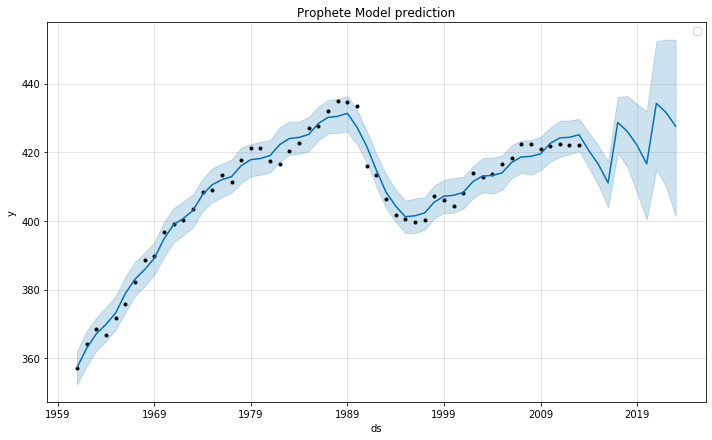

In [66]:
model.plot(forecast,uncertainty=True)
#plt.plot(df_EU.Value.values, label = "Actual",linestyle='--')
plt.legend(loc="best")
plt.axis('tight')
plt.title("Prophete Model prediction")
plt.grid(True)
plt.show()

### Apply Prophete with other continents

#### Asia

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1, 'Prophete Model Prediction in Asia')

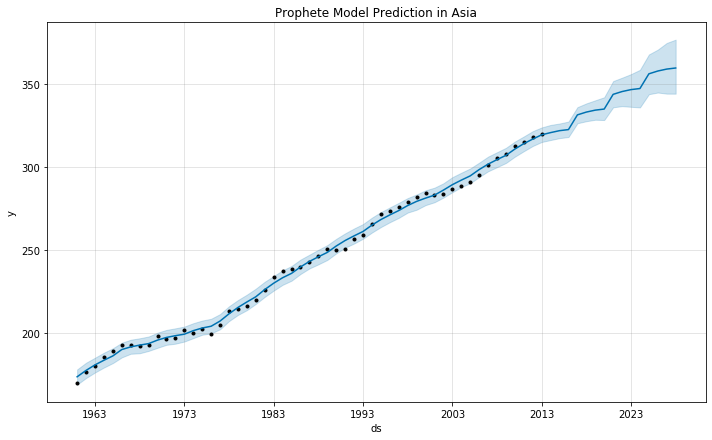

In [67]:
# Code for Prophete Model + Plot: 

model = Prophet(interval_width=0.95)
model.fit(df2)
future_dates = model.make_future_dataframe(periods=15, freq='y')
forecast = model.predict(future_dates)
model.plot(forecast,uncertainty=True)
plt.title('Prophete Model Prediction in Asia')

#### America

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1, 'Prophete Model Prediction in America')

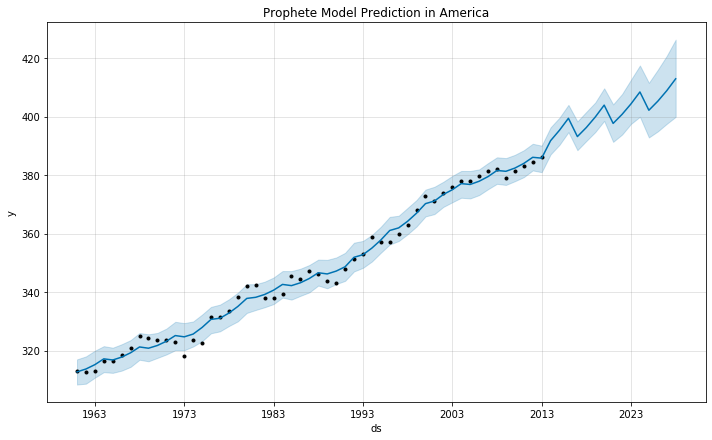

In [68]:
model = Prophet(interval_width=0.95)
model.fit(df3)
future_dates = model.make_future_dataframe(periods=15, freq='y')
forecast = model.predict(future_dates)
model.plot(forecast,uncertainty=True)
plt.title('Prophete Model Prediction in America')

#### Africa

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1, 'Prophete Model Prediction in Africa')

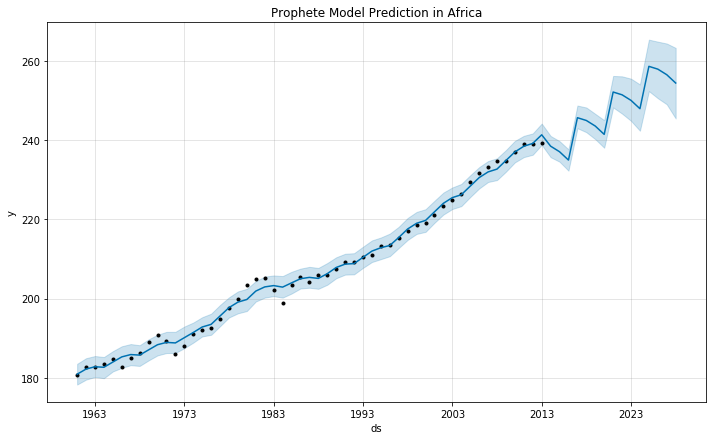

In [69]:
model = Prophet(interval_width=0.95)
model.fit(df4)
future_dates = model.make_future_dataframe(periods=15, freq='y')
forecast = model.predict(future_dates)
model.plot(forecast,uncertainty=True)
plt.title('Prophete Model Prediction in Africa')